In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import json

In [2]:
df = pd.read_csv("../data/turk_results.csv")

In [3]:
# First characterize the workers
workers = {}
for w in df[['WorkerId']].to_dict()['WorkerId'].values():
    if not w in workers:
        workers[w] = 0
    workers[w] += 1
workers = [(key, val) for (key, val) in workers.items()]
workers = sorted(workers, key=lambda x:-x[1])
print(workers)
print(len(workers))
print(len([w for w in workers if w[1] >= 40]))

[('A2MCG5W6LHSRG9', 368), ('A2VE5IV9OD2SK1', 303), ('A3P7M9666KJCP', 278), ('A34M93NJC830DP', 198), ('A3OLRWACCCCUTU', 187), ('A6DX45U3O1CR', 159), ('A1NOINYD1FZ55T', 143), ('A1DOJTVB7GXJH7', 139), ('A2J237J8KM3OCS', 138), ('A3O6D3HPXD0H8I', 128), ('A3TDUHEBFJ53NM', 113), ('A1FP3SH704X01V', 108), ('ARTQWWNFA7IOD', 89), ('A6OPXUFETV2BY', 58), ('APSN3KV49VLKX', 58), ('A1BQBQG2GNY8AY', 54), ('A3CJVRJ34U70Y9', 50), ('A3RQJM16UBTZKK', 47), ('A122E99M2DQY1G', 45), ('A1YSYI926BBOHW', 41), ('ASWZO1WY1UHEP', 40), ('A31Z5TPD8QKE26', 28), ('A2HM35CWB7IIFM', 28), ('A2W3KKNN3CAY66', 27), ('A2FCGEU5RTEWG8', 25), ('A2GM5BW75YCKKW', 22), ('A3BEGZR3FC5XQA', 22), ('A149JF209DXZKQ', 20), ('A9HQ3E0F2AGVO', 15), ('A3DU2EWFUGQCX4', 11), ('A11SX02CICZN85', 8), ('A1CF6U3GF7DZEJ', 8), ('A2I8VBHRESMG9S', 6), ('A26399B1QZ7XJJ', 6), ('A2WCCV1W8UE8ED', 5), ('A2F0X4LN9N4O4C', 5), ('A1FVXS8IM5QYO8', 4), ('A234WZ4KX8IW07', 3), ('A1IXVXZ5AYYNMJ', 3), ('A1Y0ABOUJUMCWW', 3), ('ABVM2KJ7CRNZ0', 2), ('A33VGSEJ44ORMF', 1), 

In [4]:
N = 1000
stats = []
for i in range(N):
    stats.append(json.load(open("../data/turksamples/{}.json".format(i))))

In [5]:
def rating2num(s):
    if 'Excellent' in s:
        return 5
    if 'Good' in s:
        return 4
    if 'Fair' in s:
        return 3
    if 'Poor' in s:
        return 2
    if 'Bad' in s:
        return 1

In [6]:
data = dict(fit_lam=[], distortion=[], snr=[], length=[], compression_ratio=[], rating=[])
for [idx, label] in df[['idx', 'Label']].to_numpy():
    data['rating'].append(rating2num(label))
    for key, value in stats[idx].items():
        data[key].append(value)
data['$\\lambda$'] = data['fit_lam']
df = pd.DataFrame(data=data)

/home/ctralie/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:1202: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


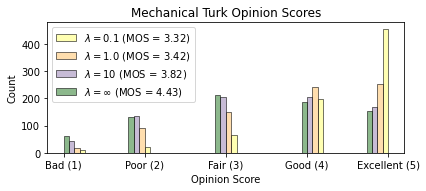

In [7]:
fac = 0.8
plt.figure(figsize=(fac*8, fac*3))
c = plt.cm.Accent
palette = {0.1:0.8*np.array(list(c.colors[0])),
          1.0:0.95*np.array(list(c.colors[1])),
          10.0:np.minimum(1, np.array(list(c.colors[2]))*1.1),
          np.inf:np.array(list(c.colors[3]))}
sns.histplot(df, x="rating", hue="$\\lambda$", palette=palette, multiple='dodge')
plt.gca().set_xticks([1, 2, 3, 4, 5])
plt.gca().set_xticklabels(["Bad (1)", "Poor (2)", "Fair (3)", "Good (4)", "Excellent (5)"]);
xy = df[['fit_lam', 'rating']].to_numpy()
keystr = {0.1:"0.1", 1.0:"1.0", 10:"10 ", np.inf:"\\infty     "}
legend = {key:"$\\lambda = {}$ (MOS = {:.2f})".format(keystr[key], np.mean(xy[xy[:, 0]==key, 1])) for key in np.unique(xy[:, 0])}
legend = [(key, value) for key, value in legend.items()]
legend = [x[1] for x in sorted(legend)]
plt.legend(legend)
plt.xlabel("Opinion Score")
plt.title("Mechanical Turk Opinion Scores")
plt.savefig("Turk.svg", bbox_inches='tight')

(0.4788399728857971, 8.596835243404816e-172)


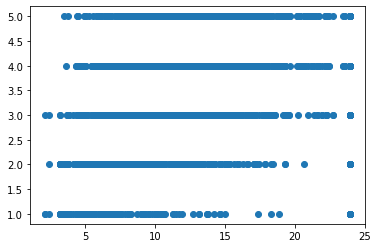

In [8]:
import scipy.stats
x = df['snr'].to_numpy()
y = df['rating'].to_numpy()
x[np.isinf(x)] = np.max(x[np.isfinite(x)])
print(scipy.stats.pearsonr(x, y))
plt.scatter(df['snr'], df['rating'])